# Лабораторная 4. Линейная регрессия

In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [ ]:
data = pd.read_csv("/content/california_housing_train.csv")
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


Получите и визуализируйте статистику по датасету (включая количество, среднее значение, стандартное отклонение, минимум, максимум и различные квантили).

In [ ]:
statistics = data.describe()
print(statistics)

          longitude      latitude  housing_median_age   total_rooms  \
count  17000.000000  17000.000000        17000.000000  17000.000000   
mean    -119.562108     35.625225           28.589353   2643.664412   
std        2.005166      2.137340           12.586937   2179.947071   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.790000     33.930000           18.000000   1462.000000   
50%     -118.490000     34.250000           29.000000   2127.000000   
75%     -118.000000     37.720000           37.000000   3151.250000   
max     -114.310000     41.950000           52.000000  37937.000000   

       total_bedrooms    population    households  median_income  \
count    17000.000000  17000.000000  17000.000000   17000.000000   
mean       539.410824   1429.573941    501.221941       3.883578   
std        421.499452   1147.852959    384.520841       1.908157   
min          1.000000      3.000000      1.000000       0.499900   
25%        297.00000

In [ ]:
X = data.drop(columns=["median_house_value"])
y = data["median_house_value"]

In [ ]:
rows_count = X.shape[0]
cols_count = X.shape[1]

means = data.mean()
corrected_dispersions = np.sum(np.power(data - means, 2)) / (rows_count - 1)
standart_offsets = np.sqrt(corrected_dispersions)
mins = data.min()
maxs = data.max()

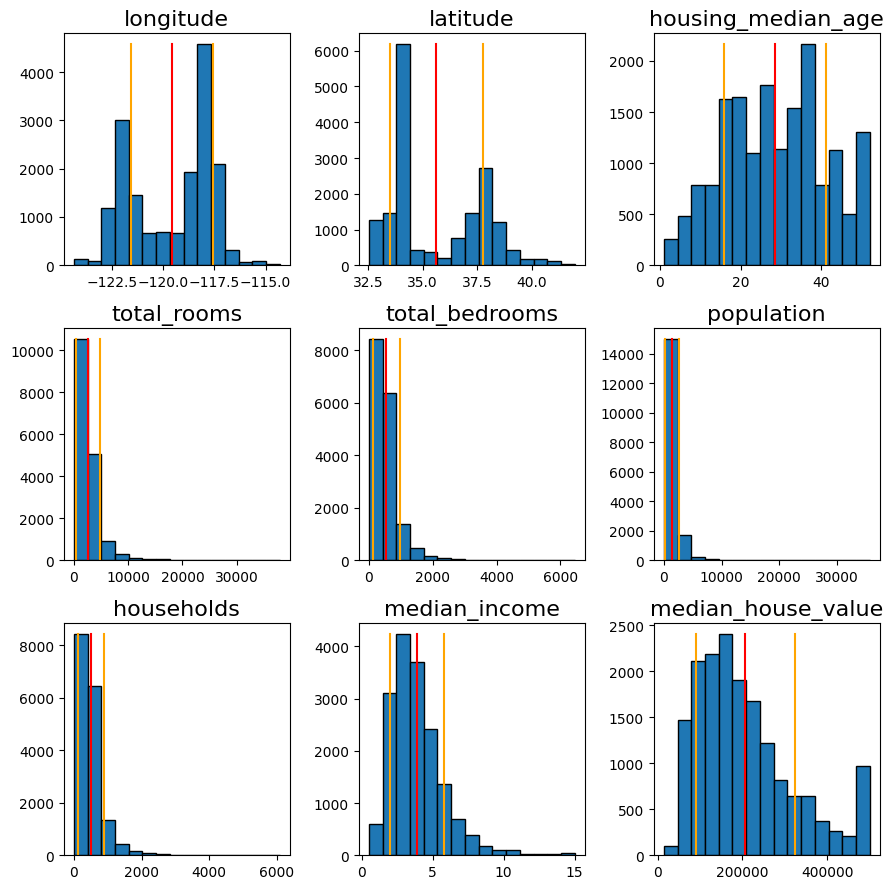

In [ ]:
# visualization

# правило стёрджеса
bins_count = 1 + int(math.log(rows_count, 2))

data_from = X.join(y)
titles = data_from.columns
fig = plt.figure(figsize=(9, 9))

for i, column in enumerate(titles):
  ax = fig.add_subplot(3, 3, i + 1)

  hist = ax.hist(data_from[column], bins = bins_count, edgecolor = "black")

  ax.plot([means[i], means[i]], [0, np.max(hist[0])], color = "red")
  ax.plot([means[i] - standart_offsets[i], means[i] - standart_offsets[i]], [0, np.max(hist[0])], color = "orange")
  ax.plot([means[i] + standart_offsets[i], means[i] + standart_offsets[i]], [0, np.max(hist[0])], color = "orange")

  ax.set_title(titles[i], fontsize=16)

fig.tight_layout()
plt.show()

In [ ]:
num_rows = data.shape[0]
num_columns = data.shape[1]
print("Количество строк в датасете:", num_rows)
print("Количество столбцов в датасете:", num_columns)

means = data.mean()
print("Средние значения для каждого столбца:")
print(means)

std_deviation = data.std()
print("Стандартное отклонение для каждого столбца:")
print(std_deviation)

min_values = data.min()
max_values = data.max()
print("Минимальные значения для каждого столбца:")
print(min_values)
print("\nМаксимальные значения для каждого столбца:")
print(max_values)

quantiles = data.quantile([0.25, 0.50, 0.75])
print("Квантили для каждого столбца (25%, 50%, 75%):")
print(quantiles)

Количество строк в датасете: 17000
Количество столбцов в датасете: 9
Средние значения для каждого столбца:
longitude               -119.562108
latitude                  35.625225
housing_median_age        28.589353
total_rooms             2643.664412
total_bedrooms           539.410824
population              1429.573941
households               501.221941
median_income              3.883578
median_house_value    207300.912353
dtype: float64
Стандартное отклонение для каждого столбца:
longitude                  2.005166
latitude                   2.137340
housing_median_age        12.586937
total_rooms             2179.947071
total_bedrooms           421.499452
population              1147.852959
households               384.520841
median_income              1.908157
median_house_value    115983.764387
dtype: float64
Минимальные значения для каждого столбца:
longitude              -124.3500
latitude                 32.5400
housing_median_age        1.0000
total_rooms               2.00

Проведите предварительную обработку данных, включая обработку отсутствующих значений, кодирование категориальных признаков и нормировка.

In [ ]:
# Обработка отсутствующих значений
data = data.dropna()

# Разделение признаков на числовые и категориальные
numerical_characteristics = ['longitude', 'latitude', 'housingMedianAge', 'totalRooms', 'totalBedrooms', 'population', 'households', 'medianIncome']
categorical_characteristics = []

# Предобработка числовых признаков
scaler = StandardScaler() # для нормализации (центрирует данные и масштабирует, ср.з. 0; ст. отк. 1)
data_scaled = data.copy()
data_scaled.iloc[:, :-1] = scaler.fit_transform(data_scaled.iloc[:, :-1]) #применяем нормализацию(-1 содержит цел. переменную),  выч парметры нормализации

Разделите данные на обучающий и тестовый наборы данных.

In [ ]:
X = data_scaled.drop(columns=['median_house_value']) #искл. столбец (ц.п.)
y = data_scaled['median_house_value'] # цп

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Реализуйте линейную регрессию с использованием метода наименьших квадратов без использования сторонних библиотек, кроме NumPy и Pandas (для использования коэффициентов использовать библиотеки тоже нельзя). Использовать минимизацию суммы квадратов разностей между фактическими и предсказанными значениями для нахождения оптимальных коэффициентов.

Линейная регрессия — это метод анализа данных, который предсказывает ценность неизвестных данных с помощью другого связанного и известного значения данных.

In [ ]:
def linear_regression(X, y, number_step=1500, learning_rate=0.5):
    number_samples, number_functions = X.shape # количество строк и столбцов
    weights = np.zeros(number_functions)
    bias = 0

    for _ in range(number_step):
        #Вычисляются предсказания модели для текущих весов и смещения
        y_pred = np.dot(X, weights) + bias

        #Границы
        dw = (1 / number_samples) * np.dot(X.T, (y_pred - y))
        db = (1 / number_samples) * np.sum(y_pred - y)

        # Обновляем веса и смещение
        weights -= learning_rate * dw
        bias -= learning_rate * db

    return weights, bias

Постройте три модели с различными наборами признаков.

r2_score **вручную**

$ R^2 = 1 - \frac {\sum (y_i - L(X_i))^2} {\sum (y_i - \bar {y}_i)^2} $


In [ ]:
def r2_score(y_true, y_pred):
  if len(y_true) > len(y_pred):
    raise Exception("len(y_true) <= len(y_pred) expected")

  n = len(y_true)
  mean = sum(y_true) / n

  return 1 - sum([(y_true[i] - y_pred[i]) ** 2 for i in range(n)]) / sum([(y_true[i] - mean) ** 2 for i in range(n)])


In [ ]:
#Функция для оценки производительности модели
def evaluate_model(model, X, y):
    y_pred = np.dot(X, model[0]) + model[1] #предсказания модели для данной матрицы признаков X (вес и смещение)
    r2 = r2_score(y, y_pred) #вычисления коэффициента детерминации (зависимость переменных) между фактическими значениями y и предсказанными значениями y_pred
    return r2

In [ ]:
# Первая модель
X_train_model1 = X_train
X_test_model1 = X_test

# Обучение первой модели (приз и цп)
model1 = linear_regression(X_train_model1.values, y_train.values)

# Предсказание
y_prediction_model1 = np.dot(X_test_model1.values, model1[0]) + model1[1] #Для тестовых признаков используются веса и смещение, полученные из обученной модели, для предсказания целевой переменной.

# Оценка производительности на тестовых данных
r2_model1 = evaluate_model(model1, X_test_model1.values, y_test)
print(f"R^2 для модели 1: {r2_model1}")

R^2 для модели 1: 0.6636396331073434


In [ ]:
#Вторая модель(исключаем признаки longitude и latitude)
X_train_model2 = X_train.copy().drop(["longitude", "latitude"], axis=1)
X_test_model2 = X_test.copy().drop(["longitude", "latitude"], axis=1)

# Обучение второй модели
weights_model2, bias_model2 = linear_regression(X_train_model2.values, y_train.values) # Веса и смещение модели сохраняются в переменные

# Предсказание
y_prediction_model2 = np.dot(X_test_model2.values, weights_model2) + bias_model2

# Оценка производительности
r2_model2 = r2_score(y_test, y_prediction_model2)
print(f"R^2 для модели 2: {r2_model2}")

R^2 для модели 2: 0.5965697317117302


Бонусное задание:

Ввести синтетический признак при построении модели

In [ ]:
 # Добавление синтетического признака
X_train_model3 = X_train.copy()
X_test_model3 = X_test.copy()

X_train_model3["income_per_household"] = X_train_model3["median_income"] * X_train_model3["households"] #income_per_household, который является произведением признаков median_income и households
X_test_model3["income_per_household"] = X_test_model3["median_income"] * X_test_model3["households"]

# Обучение модели
weights_model3, bias_model3 = linear_regression(X_train_model3.values, y_train.values)

# Предсказание
y_prediction_model3 = np.dot(X_test_model3.values, weights_model3) + bias_model3

# Оценка производительности
r2_model3 = r2_score(y_test, y_prediction_model3)
print(f"R^2 для модели 3: {r2_model3}")

R^2 для модели 3: 0.6685163546380719


Для каждой модели проведите оценку производительности, используя метрику коэффициент детерминации, чтобы измерить, насколько хорошо модель соответствует данным.

Сравните результаты трех моделей и сделайте выводы о том, какие признаки работают лучше всего для каждой модели.

In [ ]:
# Параметры для перебора
learning_rates = [0.001, 0.01, 0.1, 0.25, 0.5]
number_step = [1000, 1500, 2000, 2500, 3000]

def find_parameter(train_model, test_model):
    best_r2 = -np.inf
    best_lr = None
    best_step = None
    for lr in learning_rates:
        for step in number_step:
            # Обучение модели с заданными параметрами
            weights, bias = linear_regression(train_model.values, y_train.values, number_step=step, learning_rate=lr)

            # Предсказание на тестовом наборе
            y_pred = np.dot(test_model.values, weights) + bias

            # Прерывание работы, если переполнения
            if np.isnan(y_pred).any():
              break

            # Оценка производительности
            r2 = r2_score(y_test, y_pred)
            if r2 - best_r2 < 0.0001:
              break

            # Сохранение лучших параметров
            if r2 > best_r2:
                best_r2 = r2
                best_lr = lr
                best_step = step

    print("1.Лучший R^2:",best_r2)
    print("2.Наилучший уровень обучения:",best_lr)
    print("3.Лучшее количество итераций:",best_step)

print("Параметры для модели №1:")
find_parameter(X_train_model1, X_test_model1)
print("Параметры для модели №2:")
find_parameter(X_train_model2, X_test_model2)
print("Параметры для модели №3:")
find_parameter(X_train_model3, X_test_model3)

Параметры для модели №1:
1.Лучший R^2: 0.6635724055729721
2.Наилучший уровень обучения: 0.1
3.Лучшее количество итераций: 1000
Параметры для модели №2:
1.Лучший R^2: 0.2910223681090881
2.Наилучший уровень обучения: 0.1
3.Лучшее количество итераций: 1000
Параметры для модели №3:
1.Лучший R^2: 0.6685157581205222
2.Наилучший уровень обучения: 0.5
3.Лучшее количество итераций: 1000
